<a href="https://colab.research.google.com/github/saivaruntejamudumba/INFO-5731/blob/master/Amazon_Leetcode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

973. K Closest Points to Origin

Given an array of points where points[i] = [xi, yi] represents a point on the X-Y plane and an integer k, return the k closest points to the origin (0, 0).

The distance between two points on the X-Y plane is the Euclidean distance (i.e, √(x1 - x2)2 + (y1 - y2)2).

You may return the answer in any order. The answer is guaranteed to be unique (except for the order that it is in).

In [ ]:
class Solution:
    import math
    
    def kClosest(self, points: List[List[int]], k: int) -> List[List[int]]:
        res=[]
        dist_dict={}
        for i in range(len(points)):
            dist_dict[i]=math.sqrt((points[i][0])**2 + (points[i][1])**2)
        
        dict1 = sorted(dist_dict.items(), key=lambda x: x[1]) 
        
        i=1
        for key, value in dict1:
            
            if i<=k :
                res.append(points[key])
                i=i+1
        return res    

819. Most Common Word
Given a string paragraph and a string array of the banned words banned, return the most frequent word that is not banned. It is guaranteed there is at least one word that is not banned, and that the answer is unique.

The words in paragraph are case-insensitive and the answer should be returned in lowercase.

In [ ]:
class Solution:
    def mostCommonWord(self, paragraph: str, banned: List[str]) -> str:
        import re
        import collections
        paragraph=re.sub(r'[^\w\s]', ' ', paragraph)
        paragraph=paragraph.lower()
        
        words = paragraph.split()
        non_banned_words=[]
        for word in words:
            if word not in banned:
                non_banned_words.append(word)
        
        counts=collections.Counter(non_banned_words)
        max_repeated=counts.most_common()
        return max_repeated[0][0]
        

146. LRU Cache



In [ ]:
class LRUCache:

    def __init__(self, capacity: int):
        self.capacity = capacity
        self.cache = collections.OrderedDict()

    def get(self, key: int) -> int:
        if key not in self.cache:
            return -1
        self.cache.move_to_end(key)
        return self.cache[key]
        
    def put(self, key: int, value: int) -> None:
        if key not in self.cache and len(self.cache) == self.capacity:
            self.cache.popitem(last=False)
        self.cache[key] = value
        self.cache.move_to_end(key)
        return 'null'
        


# Your LRUCache object will be instantiated and called as such:
# obj = LRUCache(capacity)
# param_1 = obj.get(key)
# obj.put(key,value)

200 Number of Islands

In [ ]:
class Solution(object):
    def numIslands(self, grid):
        """
        :type grid: List[List[str]]
        :rtype: int
        """
        m = len(grid)
        if m == 0: return 0
        n = len(grid[0])
        if n == 0: return 0
        self.grid = grid
        cnt = 0
        for i in range(m):
            for j in range(n):
                if self.grid[i][j] == '1':
                    cnt += 1
                    self.dfs(i,j)
        return cnt
    
    def dfs(self, i, j):
        m = len(self.grid)
        n = len(self.grid[0])
        self.grid[i][j] = '-'
        if i-1 >= 0 and self.grid[i-1][j] == '1':
            self.dfs(i-1,j)
        if i+1 < m and self.grid[i+1][j] == '1':
            self.dfs(i+1,j)
        if j-1 >= 0 and self.grid[i][j-1] == '1':
            self.dfs(i,j-1)
        if j+1 < n and self.grid[i][j+1] == '1':
            self.dfs(i,j+1)

1102 - Path With Maximum Minimum Value

Given a matrix of integers A with R rows and C columns, find the maximum score of a path starting at [0,0] and ending at [R-1,C-1]. The score of a path is the minimum value in that path. For example, the value of the path 8 → 4 → 5 → 9 is 4. A path moves some number of times from one visited cell to any neighbouring unvisited cell in one of the 4 cardinal directions (north, east, west, south).


In [ ]:
from heapq import heappush, heappop
class Solution:
    def maximumMinimumPath(self, A: List[List[int]]) -> int:
      m=len(a)
      n=len(a[0])
      heap = [(-a[0][0], 0, 0)]  # - val, row, col
      visited = {(0, 0)} # or ((0,0)) [(0,0)]
      neighbours = ((1, 0), (-1, 0), (0, 1), (0, -1))
      while heap:
        val, row, col = heapq.heappop(heap)
        
        if row == m - 1 and col == n - 1:
          return - val
        
        for nrow, ncol in neighbours:
                nrow += row
                ncol += col
                if m > nrow > -1 < ncol < n and(nrow,ncol) not in visited:
                    visited.add((nrow, ncol))
                    heapq.heappush(heap, (max(-a[nrow][ncol], val), nrow, ncol))
        return -1

Robot in a Circle

In [ ]:
'''
On an infinite plane, a robot initially stands at (0, 0) and faces north.  The robot can receive one of three instructions:
"G": go straight 1 unit;
"L": turn 90 degrees to the left;
"R": turn 90 degress to the right.
The robot performs the instructions given in order, and repeats them forever.
Return true if and only if there exists a circle in the plane such that the robot never leaves the circle.
 
Example 1:
Input: "GGLLGG"
Output: true
Explanation: 
The robot moves from (0,0) to (0,2), turns 180 degrees, and then returns to (0,0).
When repeating these instructions, the robot remains in the circle of radius 2 centered at the origin.
Example 2:
Input: "GG"
Output: false
Explanation: 
The robot moves north indefinetely.
Example 3:
Input: "GL"
Output: true
Explanation: 
The robot moves from (0, 0) -> (0, 1) -> (-1, 1) -> (-1, 0) -> (0, 0) -> ...
 
Note:
1 <= instructions.length <= 100
instructions[i] is in {'G', 'L', 'R'}
'''

class Solution(object):
    def isRobotBounded(self, instructions):
        """
        :type instructions: str
        :rtype: bool
        """
        start_x, start_y = 0, 0
        left, direct = 0, 0
        moves = [[0, 1], [-1, 0], [0, -1], [1, 0]]
        instructions = instructions*4
        for instruction in instructions:
            if instruction == 'G':
                start_x += moves[direct][0]
                start_y += moves[direct][1]
            elif instruction == 'L':
                direct = (direct+1)%4
            elif instruction == 'R':
                direct = (direct+3)%4
                
        if(start_x == 0 and start_y == 0):
            return True
        return False

200. Number of Islands
Given an m x n 2D binary grid grid which represents a map of '1's (land) and '0's (water), return the number of islands.

An island is surrounded by water and is formed by connecting adjacent lands horizontally or vertically. You may assume all four edges of the grid are all surrounded by water.

 

Example 1:

Input: grid = [
  ["1","1","1","1","0"],
  ["1","1","0","1","0"],
  ["1","1","0","0","0"],
  ["0","0","0","0","0"]
]
Output: 1
Example 2:

Input: grid = [
  ["1","1","0","0","0"],
  ["1","1","0","0","0"],
  ["0","0","1","0","0"],
  ["0","0","0","1","1"]
]
Output: 3
 

Constraints:

m == grid.length
n == grid[i].length
1 <= m, n <= 300
grid[i][j] is '0' or '1'.

In [ ]:
class Solution(object):
    def numIslands(self, grid):
        """
        :type grid: List[List[str]]
        :rtype: int
        """
        # BFS with marks
        if grid is None or len(grid) == 0:
            return 0
        islands = 0
        for i in range(len(grid)):
            for j in range(len(grid[i])):
                if grid[i][j] == '1':
                    self.explore(grid, i, j)
                    islands += 1
        return islands

    def explore(self, grid, i, j):
        grid[i][j] = 'X'
        if i - 1 >= 0 and grid[i - 1][j] == '1':
            self.explore(grid, i - 1, j)
        if j - 1 >= 0 and grid[i][j - 1] == '1':
            self.explore(grid, i, j - 1)
        if i + 1 < len(grid) and grid[i + 1][j] == '1':
            self.explore(grid, i + 1, j)
        if j + 1 < len(grid[i]) and grid[i][j + 1] == '1':
            self.explore(grid, i, j + 1)

3

23 Merge K Sorted lists

In [ ]:
# Definition for singly-linked list.
# class ListNode:
#     def __init__(self, val=0, next=None):
#         self.val = val
#         self.next = next
class Solution(object):
    def mergeTwo(self, list1, list2):
        head = ListNode(0)
        prev = head
        head.next = list1
        while list1 and list2:
            
            if list1.val > list2.val:
                
                prev.next = list2
                list2 = list2.next
                prev.next.next = list1
                prev = prev.next
            else:
                prev = list1
                list1 = list1.next
                
        if list2:
             prev.next = list2
        return head.next
    
    def mergeKLists(self, lists):
        """
        :type lists: List[ListNode]
        :rtype: ListNode
        """
        n = len(lists)
        if n == 0: return None
        if n == 1: return lists[0]
        step = 1
        while step < n:
            for i in range(0, n - step, 2 * step):
                lists[i] = self.mergeTwo(lists[i], lists[i+step])
                lists[i+step] = None
            step *= 2
        return lists[0]
        
        

2

937. Reorder Data in Log Files

You are given an array of logs. Each log is a space-delimited string of words, where the first word is the identifier.

There are two types of logs:

Letter-logs: All words (except the identifier) consist of lowercase English letters.
Digit-logs: All words (except the identifier) consist of digits.
Reorder these logs so that:

The letter-logs come before all digit-logs.
The letter-logs are sorted lexicographically by their contents. If their contents are the same, then sort them lexicographically by their identifiers.
The digit-logs maintain their relative ordering.
Return the final order of the logs.

In [ ]:
class Solution:
    def reorderLogFiles(self, logs: List[str]) -> List[str]:
        
        letterlog, digitlog = [], []
        for log in logs:
            if log.split(' ')[1].isalpha():
                letterlog.append(log)
            else:
                digitlog.append(log)
                
        letterlog = sorted(sorted(letterlog, key=lambda x: x.split(' ')[0]), key=lambda x: ' '.join(x.split(' ')[1:]))
        return letterlog+digitlog

[(-1, 0, 0)]

253 Meeting Rooms II
Given an array of meeting time intervals consisting of start and end times [[s1,e1],[s2,e2],…] (si < ei), find the minimum number of conference rooms required.

Example 1:

Input: [[0, 30],[5, 10],[15, 20]]
Output: 2
Example 2:

Input: [[7,10],[2,4]]
Output: 1



In [ ]:
# Definition for an interval.
# class Interval(object):
#     def __init__(self, s=0, e=0):
#         self.start = s
#         self.end = e

class Solution(object):
    def minMeetingRooms(self, intervals):
        """
        :type intervals: List[Interval]
        :rtype: int
        """
        def takeFirst(interval):
            return interval.start
        intervals.sort(key = takeFirst)
        ends = []
        for interval in intervals:
            i = 0
            while i < len(ends):
                if interval.start >= ends[i]:
                    ends[i] = interval.end
                    break
                i += 1
            if i == len(ends):
                ends.append(interval.end)
        return len(ends)

In [ ]:
#Solution2
# Use the priority queue algorithm to generate a priority queue, representing the opened room, first sort the time period according to the start time, traverse the time period, if there is no extra room, add the conference to the queue, if there are extra rooms and The queue is updated between the start of the current meeting and the end time of the last meeting.
# Time: O(n)
# Space: O(1)

class Solution(object):
    def minMeetingRooms(self, intervals):
        """
        :type intervals: List[Interval]
        :rtype: int
        """
        # sort the intervals by start time
        intervals.sort(key = lambda x: x.start)
        heap = []
        for interval in intervals:
            if heap and interval.start >= heap[0]:
                # room is already used in last meeting and continue to use the same room for this meeting
                heapq.heapreplace(heap, interval.end)
                
            else:
                heapq.heappush(heap, interval.end)
                
        return len(heap)

295 295. Find Median from Data Stream

The median is the middle value in an ordered integer list. If the size of the list is even, there is no middle value and the median is the mean of the two middle values.

For example, for arr = [2,3,4], the median is 3.
For example, for arr = [2,3], the median is (2 + 3) / 2 = 2.5.
Implement the MedianFinder class:

MedianFinder() initializes the MedianFinder object.
void addNum(int num) adds the integer num from the data stream to the data structure.
double findMedian() returns the median of all elements so far. Answers within 10-5 of the actual answer will be accepted.

In [ ]:
class MedianFinder:

    def __init__(self):
        """
        initialize your data structure here.
        """
        self.l1=[]
        

    def addNum(self, num: int) -> None:
        self.l1.append(num)
        return 'null'
        
        

    def findMedian(self) -> float:
        
        self.l1.sort()
        if len(self.l1) % 2 ==0:
            idx=int(len(self.l1)/2)-1
            median=(self.l1[idx]+self.l1[idx+1])/2 
            
        else:
            if len(self.l1)==1:
                median=self.l1[0]
            else:
                idx=int(len(self.l1)/2)-1
                median=self.l1[idx+1]
        
        return median
        


# Your MedianFinder object will be instantiated and called as such:
# obj = MedianFinder()
# obj.addNum(num)
# param_2 = obj.findMedian()

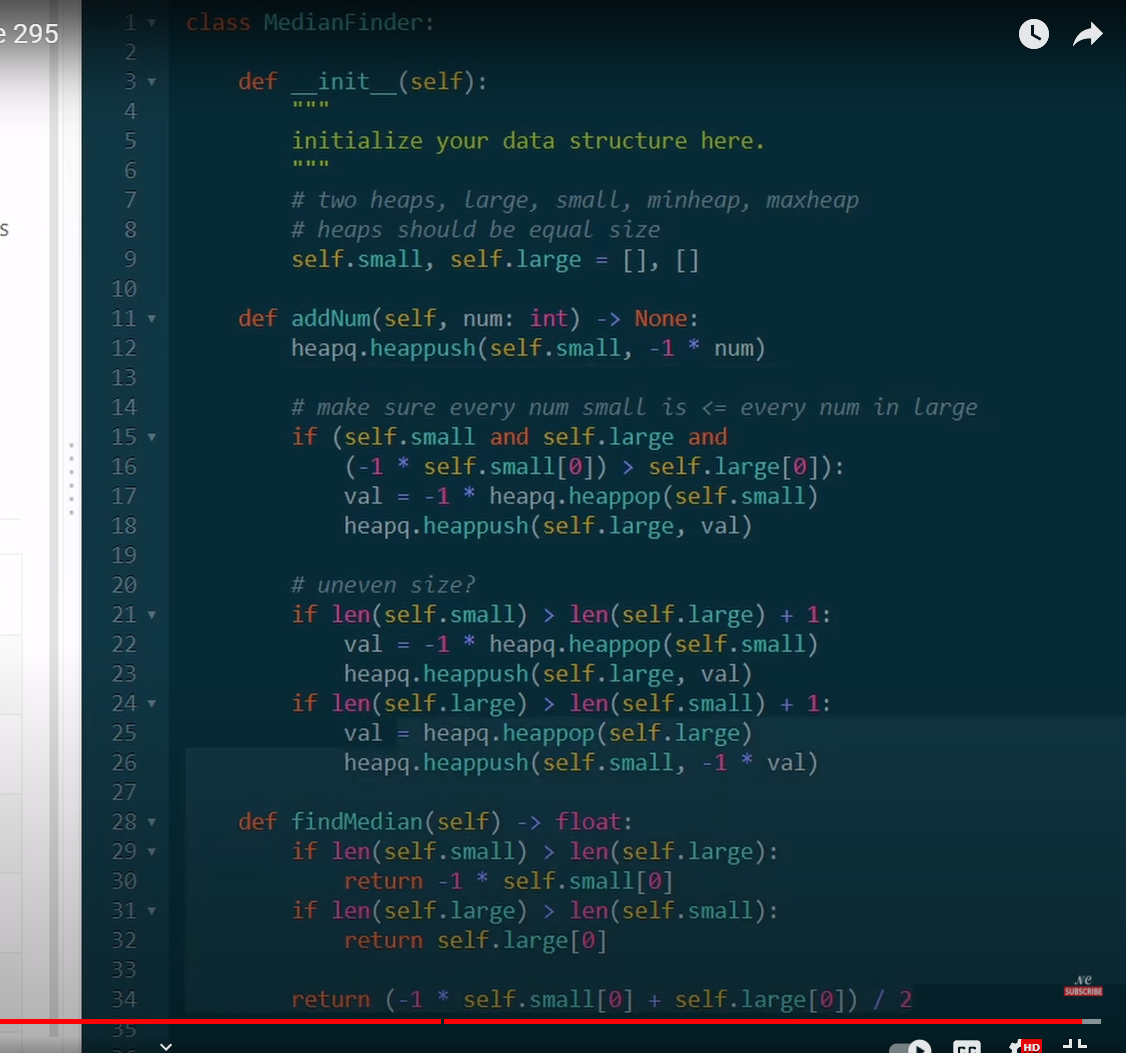

572.  Subtree of Another Tree
Given two non-empty binary trees s and t, check whether tree t has exactly the same structure and node values with a subtree of s. A subtree of s is a tree consists of a node in s and all of this node's descendants. The tree s could also be considered as a subtree of itself.

Example 1:
Given tree s:

     3
    / \
   4   5
  / \
 1   2
Given tree t:
   4 
  / \
 1   2
Return true, because t has the same structure and node values with a subtree of s.
 

Example 2:
Given tree s:

     3
    / \
   4   5
  / \
 1   2
    /
   0
Given tree t:
   4
  / \
 1   2
Return false.

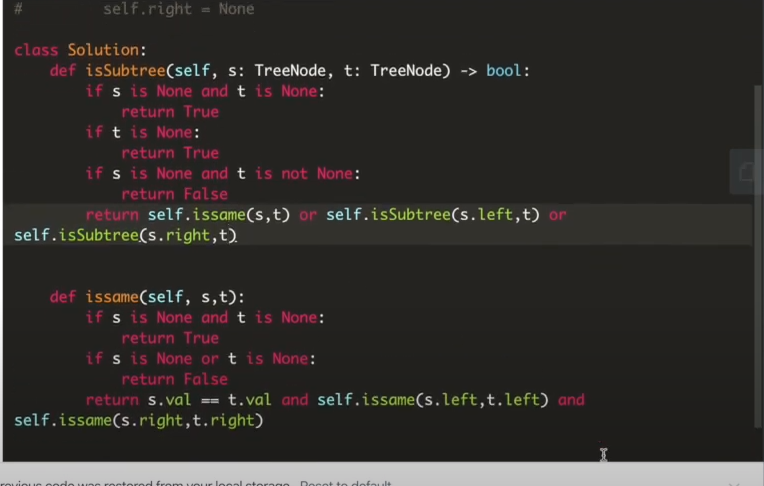

456. 132 Pattern

Given an array of n integers nums, a 132 pattern is a subsequence of three integers nums[i], nums[j] and nums[k] such that i < j < k and nums[i] < nums[k] < nums[j].

Return true if there is a 132 pattern in nums, otherwise, return false.

Follow up: The O(n^2) is trivial, could you come up with the O(n logn) or the O(n) solution?

 

Example 1:

Input: nums = [1,2,3,4]
Output: false
Explanation: There is no 132 pattern in the sequence.
Example 2:

Input: nums = [3,1,4,2]
Output: true
Explanation: There is a 132 pattern in the sequence: [1, 4, 2].
Example 3:

Input: nums = [-1,3,2,0]
Output: true
Explanation: There are three 132 patterns in the sequence: [-1, 3, 2], [-1, 3, 0] and [-1, 2, 0].
 

Constraints:

n == nums.length
1 <= n <= 104
-109 <= nums[i] <= 109

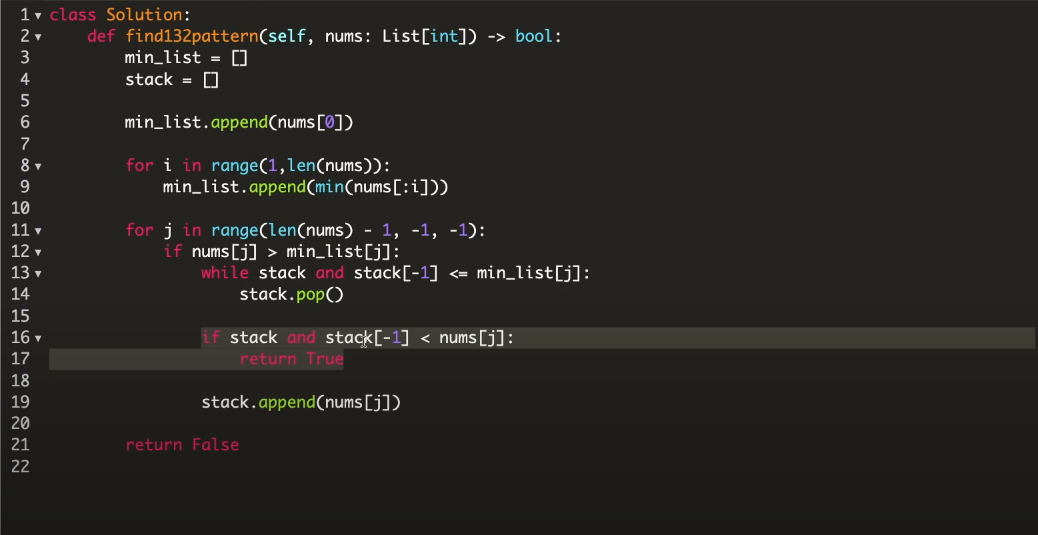

1000. Minimum Cost to Merge Stones

There are N piles of stones arranged in a row.  The i-th pile has stones[i] stones.

A move consists of merging exactly K consecutive piles into one pile, and the cost of this move is equal to the total number of stones in these K piles.

Find the minimum cost to merge all piles of stones into one pile.  If it is impossible, return -1.

 

Example 1:

Input: stones = [3,2,4,1], K = 2
Output: 20
Explanation: 
We start with [3, 2, 4, 1].
We merge [3, 2] for a cost of 5, and we are left with [5, 4, 1].
We merge [4, 1] for a cost of 5, and we are left with [5, 5].
We merge [5, 5] for a cost of 10, and we are left with [10].
The total cost was 20, and this is the minimum possible.
Example 2:

Input: stones = [3,2,4,1], K = 3
Output: -1
Explanation: After any merge operation, there are 2 piles left, and we can't merge anymore.  So the task is impossible.
Example 3:

Input: stones = [3,5,1,2,6], K = 3
Output: 25
Explanation: 
We start with [3, 5, 1, 2, 6].
We merge [5, 1, 2] for a cost of 8, and we are left with [3, 8, 6].
We merge [3, 8, 6] for a cost of 17, and we are left with [17].
The total cost was 25, and this is the minimum possible.
 

Note:

1 <= stones.length <= 30
2 <= K <= 30
1 <= stones[i] <= 100




Explanation:
Let dp(i, j) : i >= j denote the cost to merge stones in the array [j, i] to the greatest extent possible. By this, what we mean is that we will keep merging K piles at a time until no longer possible. For example, if stones = [1, 2, 3, 4] and K = 3; we will be left with 2 piles in the end.
Each time we make a merge, we are effectively pooling together a number of indices into a common set. If the starting index of the array and ending index of the array were pooled together, then our problem would be over (The last step). This also means that until the last step, there is a k such that j < k <= i, [j, k - 1] and [k, i] are exclusive sets containing indices that j and i could have been pooled with, and this leads to a divide and conquer set up for merging, with a slightly tricky constraint

In [ ]:
def mergeStones(self, stones: List[int], K: int) -> int:
        dp, N, Sum, H = {}, len(stones), {-1: 0}, {}
        for i in range(N):
            j, dp[i], H[i], Sum[i] = i, {}, {}, Sum[i - 1] + stones[i]       
            while j > -1:
                H[i][j] = (i-j+1)%(K-1)+(K-1)*(1//(1+(i-j+1)%(K-1)))
                if i - j < K - 1: dp[i][j] = 0    
                else:
                    dp[i][j] =  dp[i][i] + dp[i - 1][j]
                    for k in range(j + 1, i + 1):
                        if H[i][k] + H[k - 1][j] == H[i][j] or H[i][k] + H[k - 1][j] == K:
                            dp[i][j] = min(dp[i][j], dp[i][k] + dp[k - 1][j])     
                    if H[i][j] == 1: dp[i][j] += Sum[i] - Sum[j - 1]
                j = j - 1           
        return dp[N-1][0]*(1//H[N-1][0]) - min(H[N-1][0]-1, 1)                
                        

Solution 2:
We need K elements to form one pile or we need K+(K-1) elements to form one pile finally or K+(K-1)+(K-1) elements to form one pile element finally. In short, we can say that if elements are not of the form K+(K-1)p then we can safely return -1.

fun(i, j): minimum cost required to merge array elements from i to j (both inclusive) into a single pile. Since, we know that we need exactly K elements to form one pile, so subproblem can be written as:
fun(i, j) = fun(i, k) + fun(k+1, j) where k takes values like i, i+K-1, i+2*(K-1), ... i+p*(K-1) such i+q*(K-1)<j. fun(i,k) will merge and form one pile while fun(k+1,j) will merge and form (K-1) piles so that finally 1+(K-1) piles can be merged to form one single pile.

In [ ]:
class Solution:
    def mergeStones(self, stones: List[int], K: int) -> int:
        n = len(stones)
        if((n-1)%(K-1)): return -1
        table = [[-1]*(n) for i in range(n)]
        preSum = [0]*n
        preSum[0] = stones[0]
        for i in range(1,n):
            preSum[i] = preSum[i-1]+stones[i]

        def fun(i, j):
            if(j-i+1<K):
                return 0
            if(table[i][j]!=-1):
                return table[i][j]
            res = min((fun(i,k)+fun(k+1,j) for k in range(i,j,K-1))) #left part forms one pile and right part forms k-1 piles
            if((j-i)%(K-1)==0):
                res += preSum[j]-(preSum[i-1] if i-1>=0 else 0)
            table[i][j] = res
            return table[i][j]

        return fun(0,n-1)

In [ ]:
#Below line is responsible for taking out the sum from i to j elements (if there are exactly K elements from i to j) and add to the result so that total merging cost can be calculated.
if((j-i)%(K-1)==0):
                res += preSum[j]-(preSum[i-1] if i-1>=0 else 0)

#Time complexity: It is to calculate that there are n* n recursion calls and in each recursion call, we are doing n/K work (since for loop is running only n/K times). So, total time complexity is O(n3/K)

866. Prime Palindrome

Find the smallest prime palindrome greater than or equal to N.

Recall that a number is prime if it's only divisors are 1 and itself, and it is greater than 1. 

For example, 2,3,5,7,11 and 13 are primes.

Recall that a number is a palindrome if it reads the same from left to right as it does from right to left. 

For example, 12321 is a palindrome.

 

Example 1:

Input: 6
Output: 7
Example 2:

Input: 8
Output: 11
Example 3:

Input: 13
Output: 101
 

Note:

1 <= N <= 10^8
The answer is guaranteed to exist and be less than 2 * 10^8.

In [ ]:
class Solution:
    def primePalindrome(self, N: int) -> int:
        
        def is_prime(n):
            if n<2 or n%2 ==0:
                return n==2
            return all(n % d for d in range(3, int(n**0.5)+1, 2))
        
        if 8<=N<=11:
            return 11
        for i in range(10**(len(str(N))//2), 10**5):
            j=int(str(i)+str(i)[-2::-1])
            if j>=N and is_prime(j):
                return j
        

In [ ]:
#solution2
class Solution:
    def primePalindrome(self, N: int) -> int:
        def isPrime(N):
            return N > 1 and all(N % d for d in range(2, int(N**0.5)+1))
        
        # N must be a palindrome with odd number of digits.
        # The return value will have odd number of digits too.
        def nextPalindrome(N):
            if N in [999, 99999, 9999999]:
                return (N + 1) * 10 + 1
            n = str(N // 10 ** (len(str(N))//2) + 1)
            return int(n + n[-2::-1])
        
        if N <= 11: 
            while not isPrime(N):
                N += 1
            return N
        
        if (digits := len(str(N))) % 2 == 0:
            N = 10 ** digits + 1
        else:
            n = str(N // 10 ** (len(str(N))//2))
            if (p := int(n + n[-2::-1])) >= N:
                N = p
            else:
                N = nextPalindrome(p)
                
        while not isPrime(N):
            N = nextPalindrome(N)
        return N